In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install opencv-python
import cv2
from sklearn.cluster import KMeans


## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #色彩順序轉換

## 1-1. cluster with only RGB values

In [3]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [4]:
print(label.shape)
label.flatten()
label.shape

NameError: name 'label' is not defined

(1024, 1024, 3)
(1048576, 3)


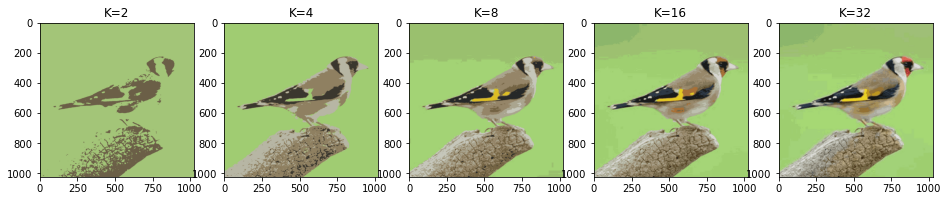

In [5]:
#只以RGB做分群 效果好
h, w, c = img.shape
print(img.shape) #有1024*1024個點  各3筆資料
T=img.reshape((-1,3))
print(T.shape)
Ka=[2,4,8,16,32]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label,center=km_clust(T,K)
    center=np.uint8(center[:,:3])
#print(center)
    res=center[label.flatten()]
#print(res.shape)
    res=res.reshape(img.shape)
#print(res.shape)
    plt.subplot(1,len(Ka),i+1)
    plt.title('K={}'.format(K))
    plt.imshow(res)
plt.show()

(1048576,)


(1048576,)

## 1-2. cluster with RGB values and the location

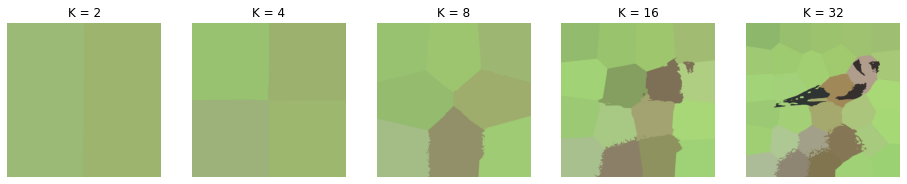

In [16]:
#以RGB及位置做分群 效果差
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

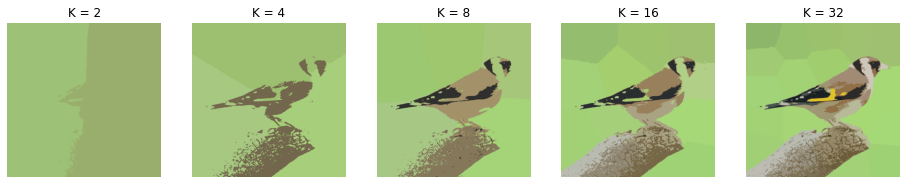

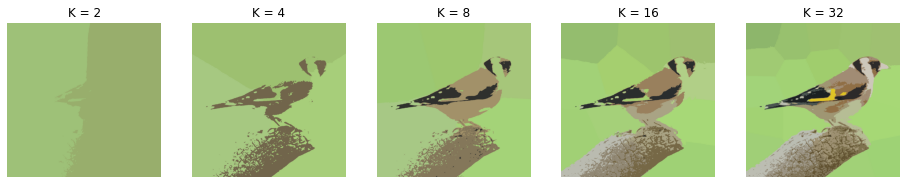

In [7]:
#改進
h, w, c = img.shape

#Added location feature
Y = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Y[h][w] = np.append(img[h][w], [[h/4], [w/4]])#限制位置 座標與pixel值一樣
Y = Y.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Y, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()